<a href="https://colab.research.google.com/github/Fadi7anna/Intro-to-AI/blob/main/Decision_Trees_Loan_Repayment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt


In [194]:
from google.colab import drive

drive.mount('/content/gdrive')
df=pd.read_csv("/content/gdrive/MyDrive/Colab datasets/Decision_Tree_ Dataset.csv")
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Initial Payment,Last Payment,Credit Score,House Number,Sum,Result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes
...,...,...,...,...,...,...
995,413,14914,523,4683,20533,No
996,359,14423,927,4838,20547,No
997,316,14872,613,4760,20561,No
998,305,14926,897,4572,20700,No


In [195]:
len(df)

1000

In [204]:
df.shape

(1000, 6)

In [205]:
df.head()

,Initial Payment,Last Payment,Credit Score,House Number,Sum,Result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [206]:
# #Seperation

X = df.loc[:, ['Initial Payment', 'Last Payment', 'Credit Score', 'House Number']] 
Y = df.loc[:, ['Result']]

In [207]:
Y


,Result
0,yes
1,yes
2,yes
3,yes
4,yes
...,...
995,No
996,No
997,No
998,No


In [208]:
#Splitting data set:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

#Function to perform training process with Entropy

clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth= 3, min_samples_leaf= 5)

clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [209]:
#Testing the model on the "test" dataset: making predictions

y_pred = clf.predict(X_test)
y_pred

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes',
       'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'ye

In [210]:
#Checking Accuracy

print("Accuracy is: ", accuracy_score(y_test, y_pred)*100)

Accuracy is:  93.66666666666667


In [211]:
#Representing the decision tree using text

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 12545.00
|   |--- feature_1 <= 11566.50
|   |   |--- feature_0 <= 485.50
|   |   |   |--- class: yes
|   |   |--- feature_0 >  485.50
|   |   |   |--- class: yes
|   |--- feature_1 >  11566.50
|   |   |--- feature_3 <= 4343.50
|   |   |   |--- class: yes
|   |   |--- feature_3 >  4343.50
|   |   |   |--- class: No
|--- feature_1 >  12545.00
|   |--- feature_1 <= 13235.50
|   |   |--- feature_3 <= 3588.50
|   |   |   |--- class: yes
|   |   |--- feature_3 >  3588.50
|   |   |   |--- class: No
|   |--- feature_1 >  13235.50
|   |   |--- feature_0 <= 128.50
|   |   |   |--- class: No
|   |   |--- feature_0 >  128.50
|   |   |   |--- class: No



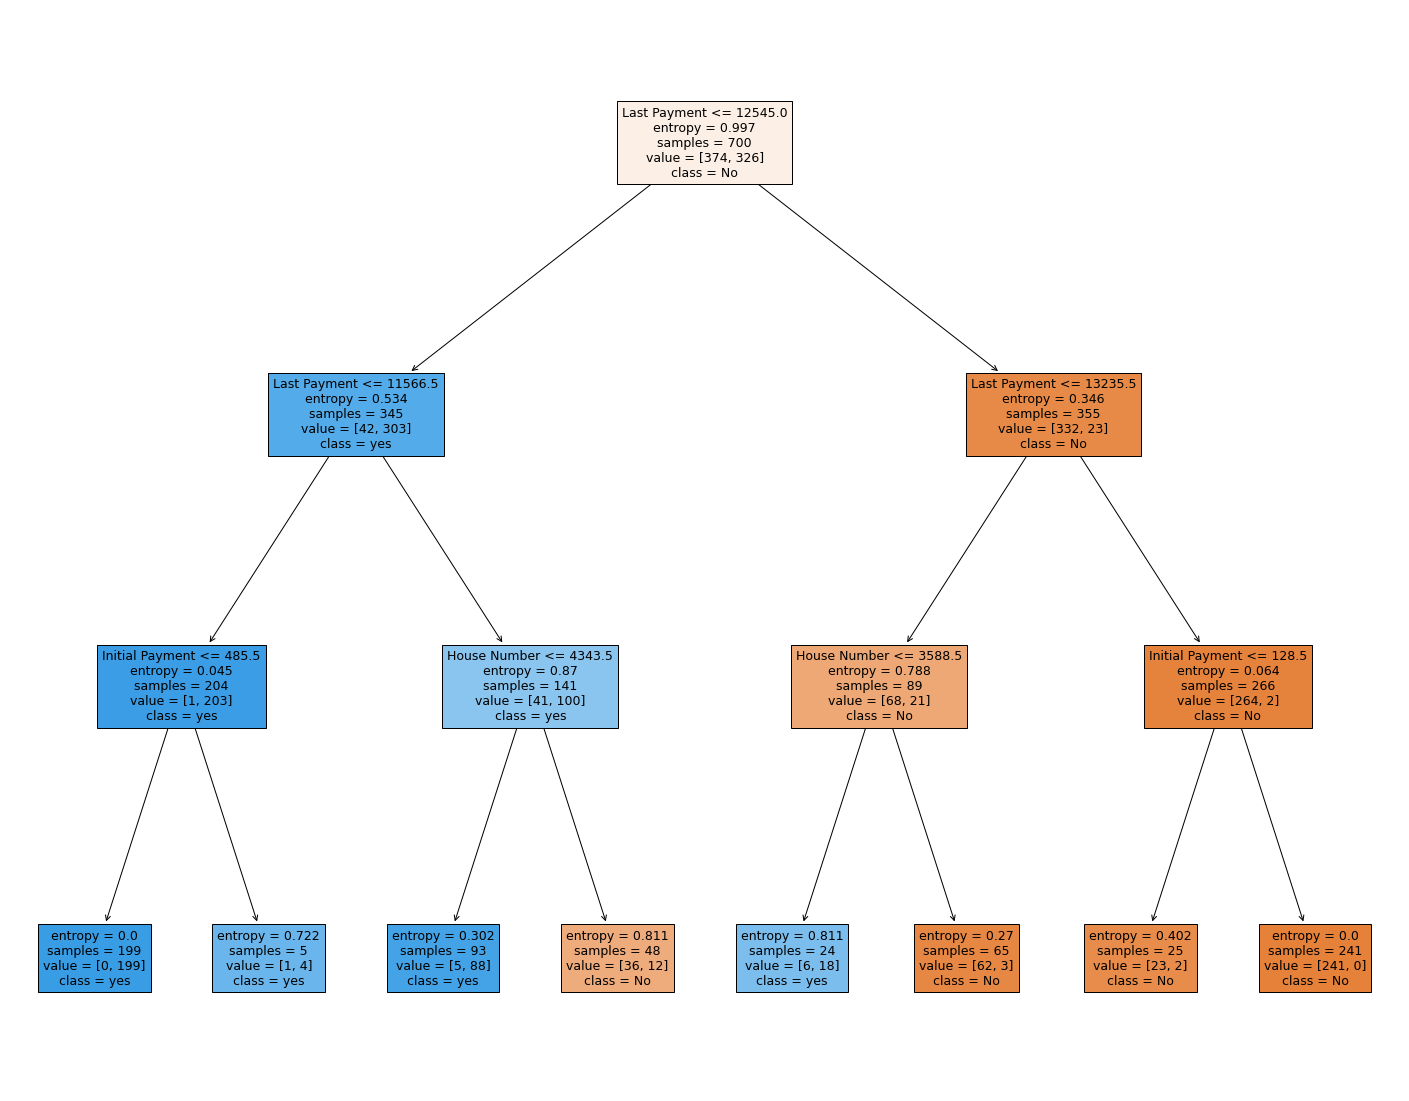

In [214]:
#  Plotting an image of the decision tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names= X.columns, class_names = clf.classes_, filled=True)